# CMPT 3510 Data Project (Environmental Predictions)
**Group Name:** Cache Me if you Can

##***Prediction Problem 5: Which Industry Is Predicted to Have the Highest Growth or Decline in Pollutant Releases in 5 Years?***

# 1. Project Overview

The goal of this project is to predict which Canadian industry will have the highest growth and the largest decline in pollutant releases over the next five years (2023–2027) using Environment and Climate Change Canada’s National Pollutant Release Inventory (NPRI) data.

The NPRI dataset tracks pollutant releases, disposals, and transfers reported by industrial facilities between 2000–2022.
This analysis focuses on release data and uses NAICS codes to group industries.



# **Preliminary Exploration**

In [ ]:
# --- STEP 1: Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    df = pd.read_excel("NPRI_2000-2022.xlsx", engine='openpyxl')
except Exception as e:
    print(f"Error reading Excel file: {e}")
    # Attempt to read as CSV if Excel fails
    try:
        df = pd.read_csv("NPRI_2000-2022.xlsx")
        print("File read successfully as CSV.")
    except Exception as csv_e:
        print(f"Error reading file as CSV: {csv_e}")
        df = None # Set df to None if both attempts fail

In [ ]:
df1 = df.copy()

In [ ]:
print(df1.shape)
df1.head(1)

(737516, 28)


,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.describe()

,Reporting_Year / Année,NPRI_ID / No_INRP,NAICS / Code_SCIAN,Latitude,Longitude,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
count,737516.000000,737516.000000,737516.000000,733434.000000,733434.000000,125032.000000,30880.000000,29861.000000,9181.000000,513282.000000,80004.000000,910.000000,5668.000000,4470.000000,53188.000000,742.000000,3080.000000,50185.000000
mean,2012.267601,11248.268386,289175.551820,49.644636,-97.375436,61.156824,91.455034,117.236013,1.742604,144.203321,23.462437,0.356315,515.614162,5.090716,79.052084,0.710053,174.901856,0.141082
std,6.400156,9352.868266,94788.542197,5.155658,20.184399,797.572502,1628.905004,856.012131,22.223163,2014.861249,218.305058,2.586239,3181.280880,93.378082,577.693253,5.332891,5342.398935,2.606306
min,2000.000000,1.000000,111120.000000,0.000000,-140.883600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3775.000000,211113.000000,45.431000,-114.767700,0.051000,0.013000,0.505400,0.000000,0.429000,0.015000,0.000000,0.001000,0.000000,0.060000,0.000000,0.000000,0.001700
50%,2012.000000,7114.000000,312140.000000,49.795100,-104.630100,0.796000,0.490000,3.561900,0.000300,4.037595,0.358000,0.000000,5.000000,0.002000,2.068000,0.000000,0.087900,0.023700
75%,2018.000000,18093.000000,327120.000000,53.508500,-79.540060,7.582000,7.458500,22.000000,0.040000,37.389000,3.953000,0.000000,47.000000,0.030000,20.578400,0.000000,1.398350,0.150000
max,2022.000000,306556.000000,913910.000000,82.498758,0.000000,58433.900000,91138.200000,39992.961045,1554.400000,235907.000000,17883.110000,39.058000,152270.000000,4500.100000,39991.000000,82.400000,259050.000000,582.000000


In [ ]:
print(df1.columns)

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')


In [ ]:
df1.dtypes

,0
Reporting_Year / Année,int64
NPRI_ID / No_INRP,int64
Number of employees,object
Company_Name / Dénomination_sociale_de_l'entreprise,object
Facility_Name / Installation,object
NAICS / Code_SCIAN,int64
NAICS Title / Titre Code_SCIAN,object
PROVINCE,object
City,object
Latitude,float64


# **Fixing Bad Housekeeping**

In [ ]:
df1.duplicated().sum()

np.int64(0)

No Duplicates to Handle

In [ ]:
#Standardize column names
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df1.columns

Index(['reporting_year_/_année', 'npri_id_/_no_inrp', 'number_of_employees',
       'company_name_/_dénomination_sociale_de_l'entreprise',
       'facility_name_/_installation', 'naics_/_code_scian',
       'naics_title_/_titre_code_scian', 'province', 'city', 'latitude',
       'longitude', 'cas_number_/_no_cas',
       'substance_name_(english)_/_nom_de_substance_(anglais)',
       'units_/_unités', 'estimation_method_/_méthode_d’estimation',
       'release_to_air_-_fugitive', 'release_to_air_-_other_non-point',
       'release_to_air_-_road_dust', 'release_to_air_-_spills',
       'release_to_air_-_stack_/_point', 'release_to_air_-_storage_/_handling',
       'releases_to_land_-_leaks', 'releases_to_land_-_other',
       'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)'],
      dtype='object')

In [ ]:
df1 = df1.drop(["npri_id_/_no_inrp", "facility_name_/_installation",
                'estimation_method_/_méthode_d’estimation',"number_of_employees","city","latitude","longitude", 'cas_number_/_no_cas'], axis=1)
#Dropped columns were determined by relevancy to our ML problem
#Redundant columns like NPRI ID and facility name also dropped

In [ ]:
df1['units_/_unités'].unique()


array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

In [ ]:

# Define conversion factors
conversion_factors = {
    'tonnes': 1,
    'kilograms': 0.001,
    'grams': 0.000001
}

release_cols_raw = [
    'release_to_air_-_fugitive',
    'release_to_air_-_other_non-point',
    'release_to_air_-_road_dust',
    'release_to_air_-_spills',
    'release_to_air_-_stack_/_point',
    'release_to_air_-_storage_/_handling',
    'releases_to_land_-_leaks',
    'releases_to_land_-_other',
    'releases_to_land_-_spills',
    'releases_to_water_bodies_-_direct_discharges',
    'releases_to_water_bodies_-_leaks',
    'releases_to_water_bodies_-_spills'
]

conv_factor_vector = df1['units_/_unités'].map(conversion_factors).fillna(1)

df1[release_cols_raw] = df1[release_cols_raw].multiply(conv_factor_vector, axis=0)

df1['units_/_unités'] = np.where(df1['units_/_unités'] == 'g TEQ', 'g TEQ', 'tonnes')


#Chronological Order

In [ ]:
df1.sort_values(by=['reporting_year_/_année'])

,reporting_year_/_année,company_name_/_dénomination_sociale_de_l'entreprise,naics_/_code_scian,naics_title_/_titre_code_scian,province,substance_name_(english)_/_nom_de_substance_(anglais),units_/_unités,release_to_air_-_fugitive,release_to_air_-_other_non-point,release_to_air_-_road_dust,release_to_air_-_spills,release_to_air_-_stack_/_point,release_to_air_-_storage_/_handling,releases_to_land_-_leaks,releases_to_land_-_other,releases_to_land_-_spills,releases_to_water_bodies_-_direct_discharges,releases_to_water_bodies_-_leaks,releases_to_water_bodies_-_spills,sum_of_release_to_all_media_(<1tonne)
22,2000,Pine Falls Paper Company,322122,Newsprint mills,MB,"Dibenz[a,h]anthracene",tonnes,NaN,NaN,NaN,NaN,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2000,Pine Falls Paper Company,322122,Newsprint mills,MB,Benzo[a]pyrene,tonnes,NaN,NaN,NaN,NaN,2.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2000,Pine Falls Paper Company,322122,Newsprint mills,MB,Benzo[k]fluoranthene,tonnes,NaN,NaN,NaN,NaN,1.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2000,Pine Falls Paper Company,322122,Newsprint mills,MB,Fluoranthene,tonnes,NaN,NaN,NaN,NaN,22.391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2000,Pine Falls Paper Company,322122,Newsprint mills,MB,Benzo[b]fluoranthene,tonnes,NaN,NaN,NaN,NaN,4.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737485,2022,Coastal Resources Ltd.,211110,Oil and gas extraction (except oil sands),AB,Sulphur dioxide,tonnes,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737513,2022,Astara Energy Corp.,211110,Oil and gas extraction (except oil sands),AB,Volatile Organic Compounds (Total),tonnes,NaN,NaN,NaN,NaN,NaN,0.018689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737514,2022,Astara Energy Corp.,211110,Oil and gas extraction (except oil sands),AB,Volatile Organic Compounds (Total),tonnes,NaN,NaN,NaN,NaN,NaN,0.000879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737515,2022,Paramount Resources Ltd.,211110,Oil and gas extraction (except oil sands),AB,Volatile Organic Compounds (Total),tonnes,NaN,NaN,NaN,NaN,NaN,20.286830,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1['reporting_year_/_année'] = pd.to_datetime(df1['reporting_year_/_année'], format='%Y')

# **Issue Detection**

# **Handling Missing Values**

In [ ]:
df1.isnull().sum()

,0
reporting_year_/_année,0
company_name_/_dénomination_sociale_de_l'entreprise,0
naics_/_code_scian,0
naics_title_/_titre_code_scian,0
province,0
substance_name_(english)_/_nom_de_substance_(anglais),0
units_/_unités,0
release_to_air_-_fugitive,612484
release_to_air_-_other_non-point,706636
release_to_air_-_road_dust,707655


#Handling Release Missing Values

**sum_of_release_to_all_media_(<1tonne) Included**

In [ ]:
release_cols = ["release_to_air_-_fugitive", "release_to_air_-_other_non-point",
"release_to_air_-_road_dust",
"release_to_air_-_spills",
"release_to_air_-_stack_/_point",
"release_to_air_-_storage_/_handling",
"releases_to_land_-_leaks",
"releases_to_land_-_other",
"releases_to_land_-_spills",
"releases_to_water_bodies_-_direct_discharges",
"releases_to_water_bodies_-_leaks",
"releases_to_water_bodies_-_spills", "sum_of_release_to_all_media_(<1tonne)"]
#sum_of_release_to_all_media_(<1tonne) is incuded when checking

In [ ]:
releases_df = df1[release_cols].copy()

In [ ]:
missing_all = releases_df[releases_df.isna().all(axis=1)]
missing_all.shape[0]
#Zero Missing Values, checks if the whole row is empty

0

**sum_of_release_to_all_media_(<1tonne) Excluded**

In [ ]:
release_cols1 = ["release_to_air_-_fugitive", "release_to_air_-_other_non-point",
"release_to_air_-_road_dust",
"release_to_air_-_spills",
"release_to_air_-_stack_/_point",
"release_to_air_-_storage_/_handling",
"releases_to_land_-_leaks",
"releases_to_land_-_other",
"releases_to_land_-_spills",
"releases_to_water_bodies_-_direct_discharges",
"releases_to_water_bodies_-_leaks",
"releases_to_water_bodies_-_spills"]

In [ ]:
releases_df1 = df1[release_cols1].copy()

In [ ]:
missing_all1 = releases_df1[releases_df1.isna().all(axis=1)]
missing_all1.shape[0]

49812

**Missing Values Documentation**

In our analysis, we defined a true missing value as any record where no release information was reported in any medium (air, land, or water). To identify such cases, we isolated all release-related columns and checked for rows where every release field was empty.

Initially, several records appeared to have missing values; however, further inspection revealed that these were not true missing entries. Instead, they represented facilities that did not report measurable releases because their total emissions were below one tonne, as indicated by the column sum_of_release_to_all_media_(<1tonne).

To address this, we:

Confirmed that rows with all empty detailed release values corresponded to valid <1 tonne totals.

Imputed those totals into the combined column release_to_all_media_combined to maintain completeness.

Ensured that no false zeros were introduced by applying imputations only when all detailed release columns were empty.


**Creating Release-Specific Columns**

In [ ]:
cols = [
    "release_to_air_-_fugitive",
    "release_to_air_-_other_non-point",
    "release_to_air_-_road_dust",
    "release_to_air_-_spills",
    "release_to_air_-_stack_/_point",
    "release_to_air_-_storage_/_handling"
]
# Convert to numeric, forcing non-numeric values to NaN
df1[cols] = df1[cols].apply(pd.to_numeric, errors="coerce")
# Create a new combined column that sums them up (ignores NaN)
df1["release_to_air_combined"] = df1[cols].sum(axis=1, skipna=True)
#if the whole row is empty, classify as NaN, so that we don't impute zero mistakenly and true missing values remain missing
df1.loc[df1[cols].isna().all(axis=1), "release_to_air_combined"] = np.nan

In [ ]:
land_cols = [
    "releases_to_land_-_leaks",
    "releases_to_land_-_other",
    "releases_to_land_-_spills"
]

df1[land_cols] = df1[land_cols].apply(pd.to_numeric, errors="coerce")
df1["release_to_land_combined"] = df1[land_cols].sum(axis=1, skipna=True)
df1.loc[df1[land_cols].isna().all(axis=1), "release_to_land_combined"] = np.nan

In [ ]:
water_cols = [
    "releases_to_water_bodies_-_direct_discharges",
    "releases_to_water_bodies_-_leaks",
    "releases_to_water_bodies_-_spills"
]

df1[water_cols] = df1[water_cols].apply(pd.to_numeric, errors="coerce")
df1["release_to_water_combined"] = df1[water_cols].sum(axis=1, skipna=True)
df1.loc[df1[water_cols].isna().all(axis=1), "release_to_water_combined"] = np.nan

In [ ]:
# Columns already combined
combined_cols = ["release_to_air_combined", "release_to_land_combined", "release_to_water_combined"]

# Sum all combined releases
df1["release_to_all_media_combined"] = df1[combined_cols].sum(axis=1, skipna=True)

# If all three combined columns are NaN, set total to NaN
df1.loc[df1[combined_cols].isna().all(axis=1), "release_to_all_media_combined"] = np.nan

In [ ]:
#Ensuring that missing values remain missing to handle later.
df1["release_to_all_media_combined"].isna().sum()

np.int64(49812)

In [ ]:
df1.isnull().sum()

,0
reporting_year_/_année,0
company_name_/_dénomination_sociale_de_l'entreprise,0
naics_/_code_scian,0
naics_title_/_titre_code_scian,0
province,0
substance_name_(english)_/_nom_de_substance_(anglais),0
units_/_unités,0
release_to_air_-_fugitive,612484
release_to_air_-_other_non-point,706636
release_to_air_-_road_dust,707655


**Imputing Missing Values**

Checking ditrubtion of Releases, to impute all media releases accordingly

In [ ]:
release_cols = [
    "release_to_air_combined",
    "release_to_land_combined",
    "release_to_water_combined",
]

# Calculate total releases per medium (ignoring missing values)
release_sums = df1[release_cols].sum(skipna=True)

# Calculate percentage distribution
release_percentages = (release_sums / release_sums.sum()) * 100

# Display results clearly
print("Percentage distribution of releases by medium:")
print(release_percentages)

Percentage distribution of releases by medium:
release_to_air_combined      92.098532
release_to_land_combined      3.026632
release_to_water_combined     4.874836
dtype: float64


In [ ]:
air_pct = 0.920
water_pct = 0.0302
land_pct = 0.0487

In [ ]:
air_col = "release_to_air_combined"
land_col = "release_to_land_combined"
water_col = "release_to_water_combined"
total_col = "release_to_all_media_combined"
less_1t_col = "sum_of_release_to_all_media_(<1tonne)"

#Find rows where total releases are missing, but the <1 tonne data exists
mask_missing = df1[total_col].isna() & df1[less_1t_col].notna()

df1.loc[mask_missing, air_col] = df1.loc[mask_missing, less_1t_col] * release_percentages[air_col]
df1.loc[mask_missing, land_col] = df1.loc[mask_missing, less_1t_col] * release_percentages[land_col]
df1.loc[mask_missing, water_col] = df1.loc[mask_missing, less_1t_col] * release_percentages[water_col]

df1.loc[mask_missing, total_col] = df1.loc[mask_missing, less_1t_col]

In [ ]:
df1.isnull().sum()

,0
reporting_year_/_année,0
company_name_/_dénomination_sociale_de_l'entreprise,0
naics_/_code_scian,0
naics_title_/_titre_code_scian,0
province,0
substance_name_(english)_/_nom_de_substance_(anglais),0
units_/_unités,0
release_to_air_-_fugitive,612484
release_to_air_-_other_non-point,706636
release_to_air_-_road_dust,707655


Handling the Remaining Missing values for Release

The remaining missing values are true missing values, that have nothing reported

In [ ]:
#Checking Skewness of Release columns to determine appropriate method of Imputation
print(df1['release_to_air_combined'].skew())
print(df1['release_to_land_combined'].skew())
print(df1['release_to_water_combined'].skew())

56.683540721868646
79.71255458583403
188.68564089683886


Highly Skewed Values and Missing at Random, appropriate method is Median imputation

In [ ]:
release_cols = ['release_to_air_combined',
                'release_to_land_combined',
                'release_to_water_combined']

for col in release_cols:
    median_value = df1[col].median()
    df1[col] = df1[col].fillna(median_value)

In [ ]:
#Checking Skewness again to see difference

In [ ]:
print(df1['release_to_air_combined'].skew())
print(df1['release_to_land_combined'].skew())
print(df1['release_to_water_combined'].skew())
#The stark different in the before and after of realease to land and water makes sense
#because there was a signifcant amount of missing values in those columns

58.30908320226893
280.0850230783796
500.9001117567165


In [ ]:
#dropping the hyper-specific release columns as they are no longer relevent to us
cols_to_drop = [
    "release_to_air_-_fugitive", "release_to_air_-_other_non-point",
    "release_to_air_-_road_dust", "release_to_air_-_spills",
    "release_to_air_-_stack_/_point", "release_to_air_-_storage_/_handling",
    "releases_to_land_-_leaks", "releases_to_land_-_other",
    "releases_to_land_-_spills", "releases_to_water_bodies_-_direct_discharges",
    "releases_to_water_bodies_-_leaks", "releases_to_water_bodies_-_spills", "sum_of_release_to_all_media_(<1tonne)"
]

df1.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df1.head(1)

,reporting_year_/_année,company_name_/_dénomination_sociale_de_l'entreprise,naics_/_code_scian,naics_title_/_titre_code_scian,province,substance_name_(english)_/_nom_de_substance_(anglais),units_/_unités,release_to_air_combined,release_to_land_combined,release_to_water_combined,release_to_all_media_combined
0,2000-01-01,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,Chlorine dioxide,tonnes,5.2,0.069613,0.380237,5.2


#Handling All Other Missing Values

In [ ]:
df1.isnull().sum()

,0
reporting_year_/_année,0
company_name_/_dénomination_sociale_de_l'entreprise,0
naics_/_code_scian,0
naics_title_/_titre_code_scian,0
province,0
substance_name_(english)_/_nom_de_substance_(anglais),0
units_/_unités,0
release_to_air_combined,0
release_to_land_combined,0
release_to_water_combined,0


In [ ]:
df1.shape

(737516, 11)

# **Handling Outliers**

**Finding Outliers**: Univariate Method

Releases to Air

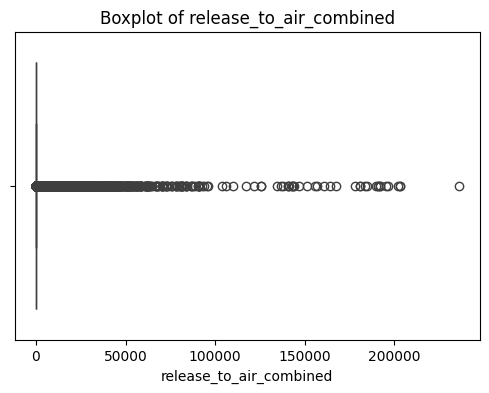

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df1['release_to_air_combined'])
plt.title('Boxplot of release_to_air_combined')
plt.show()

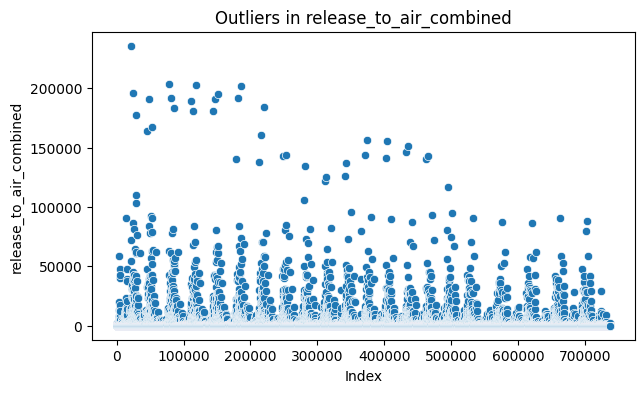

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_air_combined'])
plt.title('Outliers in release_to_air_combined')
plt.xlabel('Index')
plt.ylabel('release_to_air_combined')
plt.show()

Releases to Land

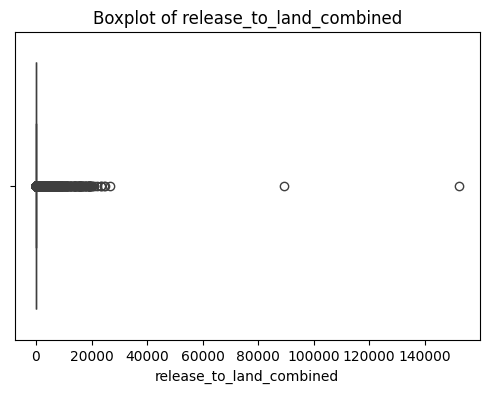

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df1['release_to_land_combined'])
plt.title('Boxplot of release_to_land_combined')
plt.show()

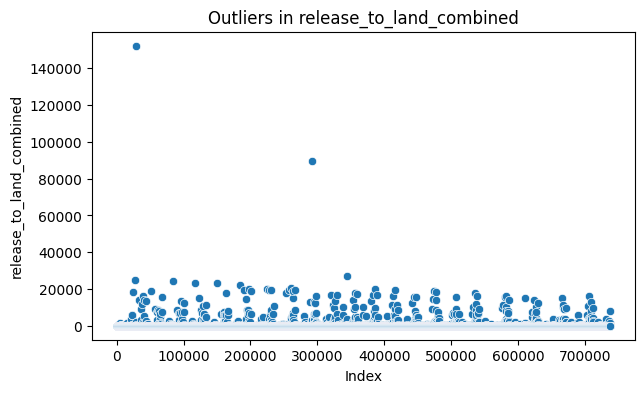

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_land_combined'])
plt.title('Outliers in release_to_land_combined')
plt.xlabel('Index')
plt.ylabel('release_to_land_combined')
plt.show()

Releases to Water

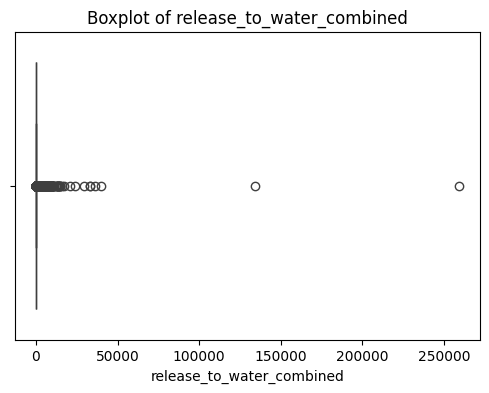

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df1['release_to_water_combined'])
plt.title('Boxplot of release_to_water_combined')
plt.show()

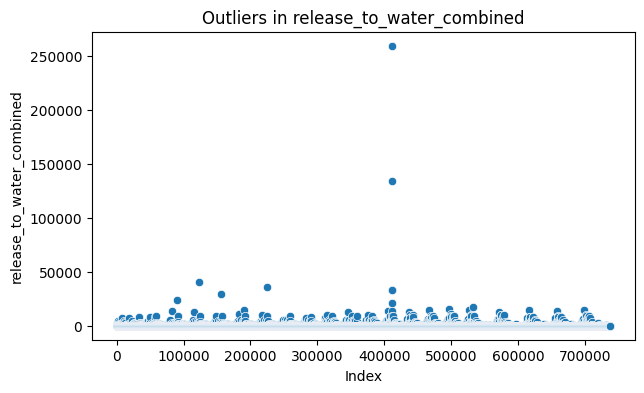

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_water_combined'])
plt.title('Outliers in release_to_water_combined')
plt.xlabel('Index')
plt.ylabel('release_to_water_combined')
plt.show()

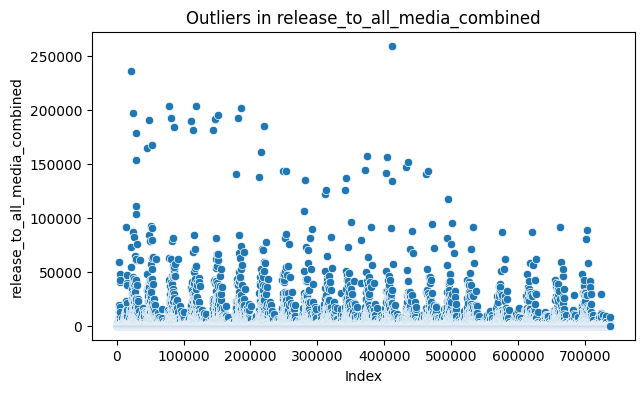

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_all_media_combined'])
plt.title('Outliers in release_to_all_media_combined')
plt.xlabel('Index')
plt.ylabel('release_to_all_media_combined')
plt.show()

**Handling Outliers**

Quantile Capping for Skewed Data

Capping is a robust method for handling outliers in skewed data because it limits extreme values without removing any rows. This preserves important observations while preventing extreme spikes from distorting analysis or model results, making it ideal for large or heavily skewed datasets. The data we are currently handling is highly skewed, making it an appropriate method for handling outliers

In [ ]:
release_cols = [
    "release_to_air_combined",
    "release_to_land_combined",
    "release_to_water_combined",'release_to_all_media_combined'
]

for col in release_cols:
    lower_limit = df1[col].quantile(0.01)   # 1st percentile
    upper_limit = df1[col].quantile(0.995)   # 99.5th percentile

    df1[col] = df1[col].clip(lower=lower_limit, upper=upper_limit)

**Rechecking Visualizations**

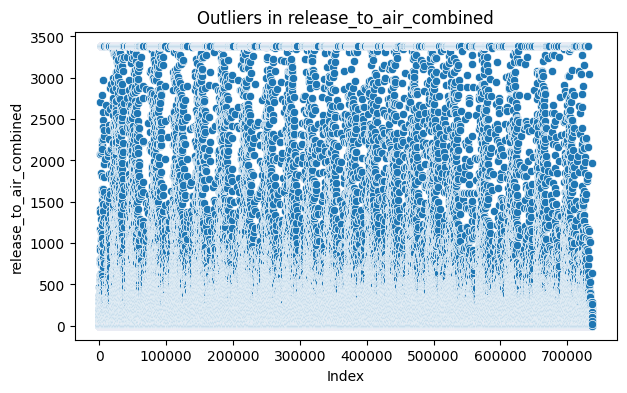

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_air_combined'])
plt.title('Outliers in release_to_air_combined')
plt.xlabel('Index')
plt.ylabel('release_to_air_combined')
plt.show()

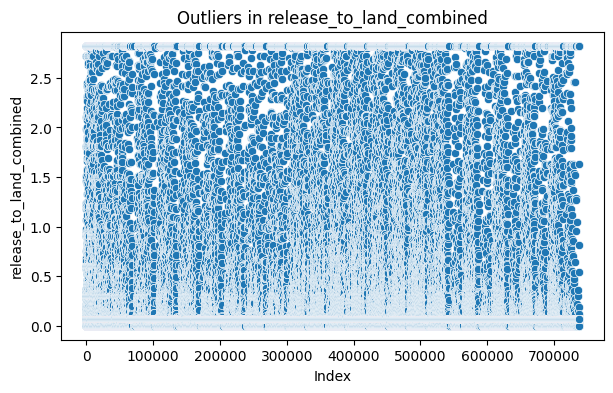

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_land_combined'])
plt.title('Outliers in release_to_land_combined')
plt.xlabel('Index')
plt.ylabel('release_to_land_combined')
plt.show()

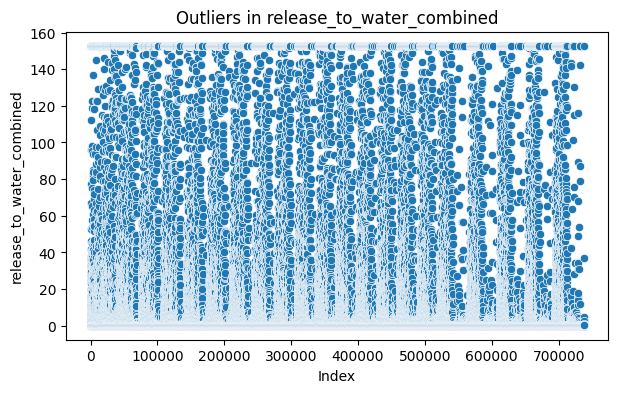

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_water_combined'])
plt.title('Outliers in release_to_water_combined')
plt.xlabel('Index')
plt.ylabel('release_to_water_combined')
plt.show()

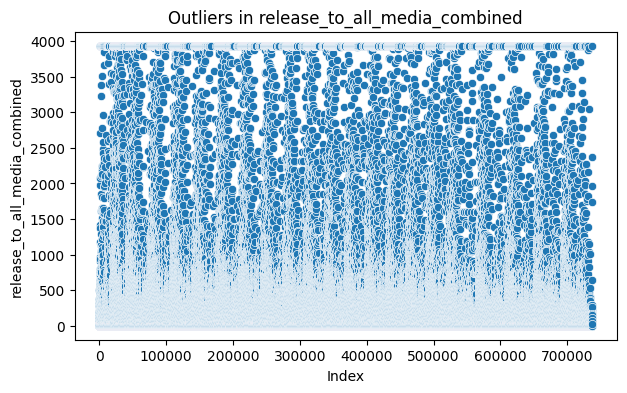

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df1.index, y=df1['release_to_all_media_combined'])
plt.title('Outliers in release_to_all_media_combined')
plt.xlabel('Index')
plt.ylabel('release_to_all_media_combined')
plt.show()

# **Visulization and statistics**

Top 10 Industries with the most Combined Releases in Order

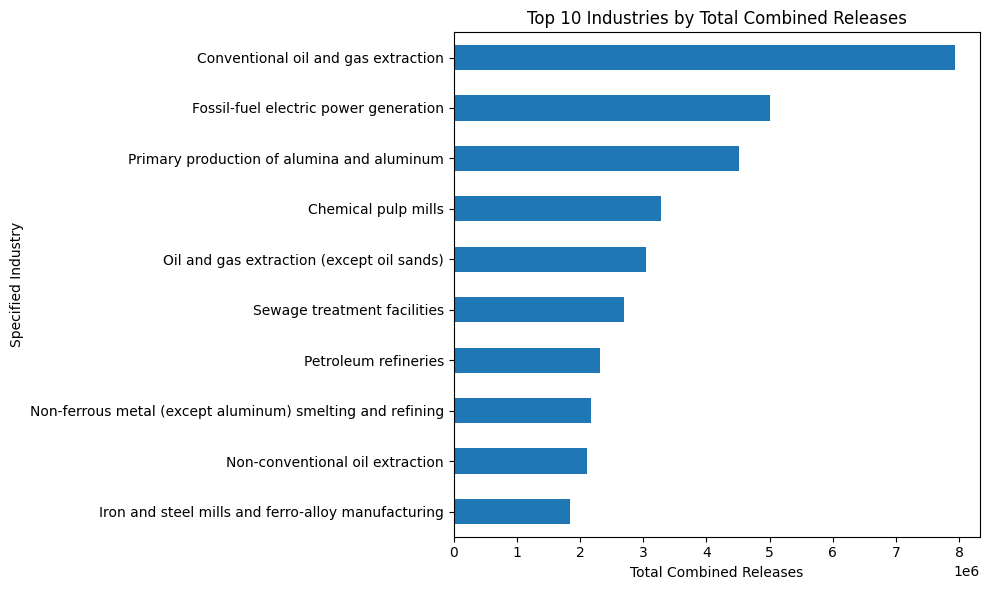

In [ ]:
top10 = (
    df1.groupby('naics_title_/_titre_code_scian')['release_to_all_media_combined']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
top10.plot(kind='barh', color='#1f77b6')
plt.title("Top 10 Industries by Total Combined Releases")
plt.xlabel("Total Combined Releases")
plt.ylabel("Specified Industry")
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()


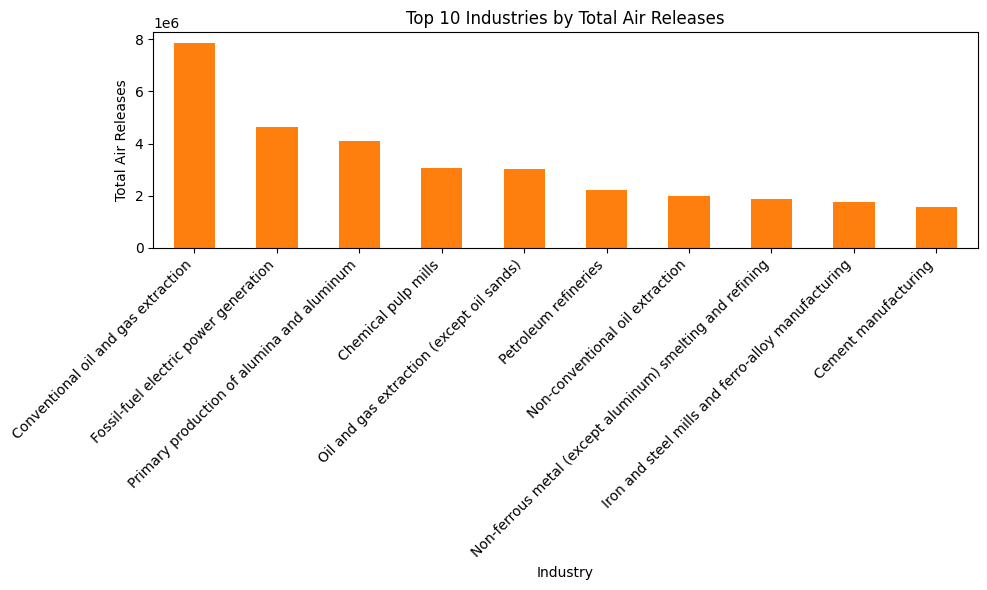

In [ ]:
top10_air = df1.groupby('naics_title_/_titre_code_scian')['release_to_air_combined'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top10_air.plot(kind='bar', color='#ff7f0e')
plt.title("Top 10 Industries by Total Air Releases")
plt.xlabel("Industry")
plt.ylabel("Total Air Releases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

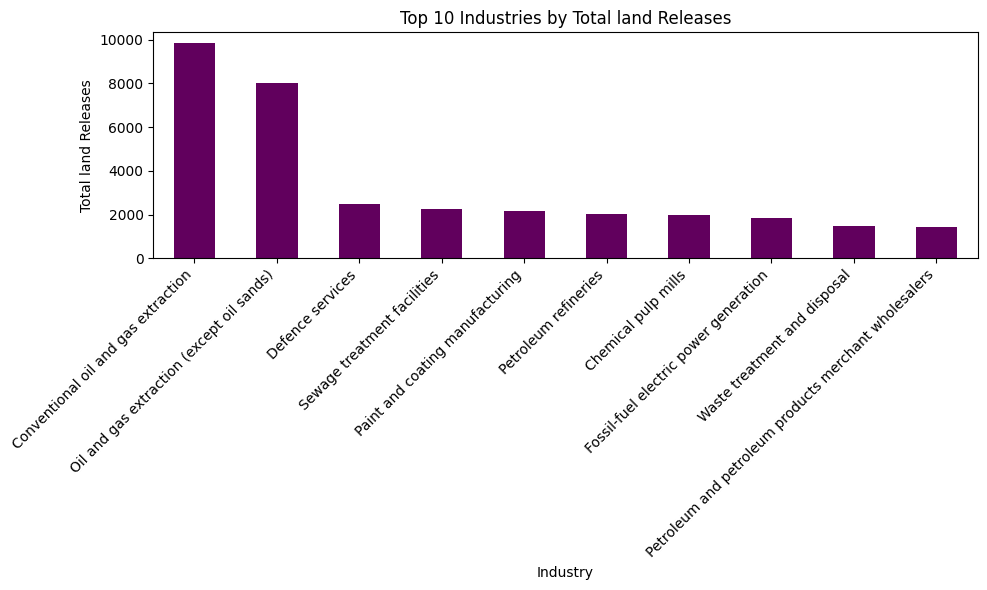

In [ ]:
top10_air = df1.groupby('naics_title_/_titre_code_scian')['release_to_land_combined'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top10_air.plot(kind='bar', color='#61005d')
plt.title("Top 10 Industries by Total land Releases")
plt.xlabel("Industry")
plt.ylabel("Total land Releases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

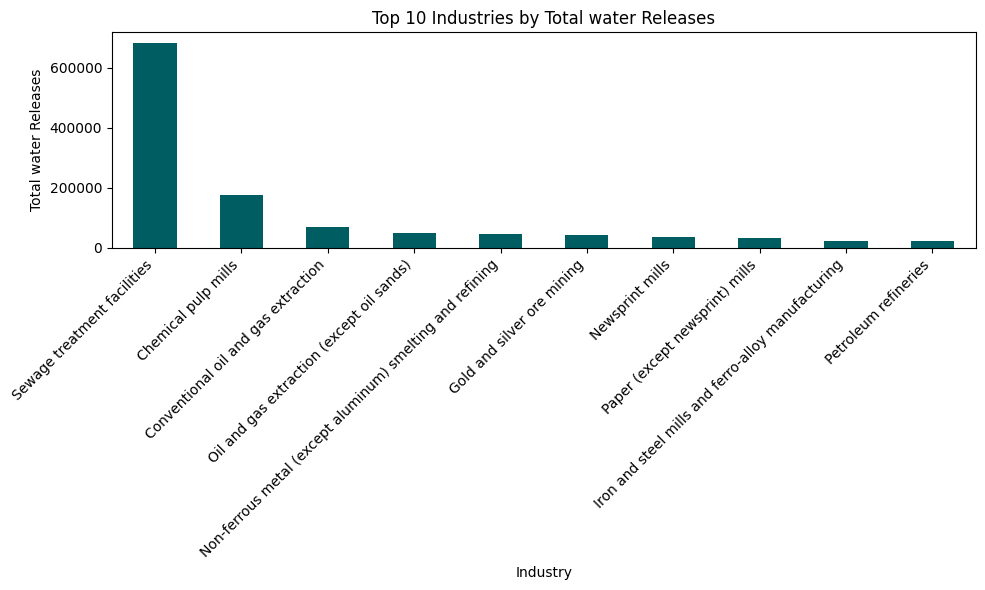

In [ ]:
top10_air = df1.groupby('naics_title_/_titre_code_scian')['release_to_water_combined'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top10_air.plot(kind='bar', color='#005d61')
plt.title("Top 10 Industries by Total water Releases")
plt.xlabel("Industry")
plt.ylabel("Total water Releases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df1.columns

Index(['reporting_year_/_année',
       'company_name_/_dénomination_sociale_de_l'entreprise',
       'naics_/_code_scian', 'naics_title_/_titre_code_scian', 'province',
       'substance_name_(english)_/_nom_de_substance_(anglais)',
       'units_/_unités', 'release_to_air_combined', 'release_to_land_combined',
       'release_to_water_combined', 'release_to_all_media_combined'],
      dtype='object')

In [ ]:
df1.columns

Index(['reporting_year_/_année',
       'company_name_/_dénomination_sociale_de_l'entreprise',
       'naics_/_code_scian', 'naics_title_/_titre_code_scian', 'province',
       'substance_name_(english)_/_nom_de_substance_(anglais)',
       'units_/_unités', 'release_to_air_combined', 'release_to_land_combined',
       'release_to_water_combined', 'release_to_all_media_combined'],
      dtype='object')

In [ ]:
# Create ind_year by grouping and aggregating df1
ind_year = df1.groupby(['reporting_year_/_année', 'naics_title_/_titre_code_scian'])['release_to_all_media_combined'].sum().reset_index()
ind_year = ind_year.rename(columns={'naics_title_/_titre_code_scian': 'IND', 'release_to_all_media_combined': 'total_release'})
display(ind_year.head())

,reporting_year_/_année,IND,total_release
0,2000-01-01,Abrasive product manufacturing,11.181
1,2000-01-01,Adhesive manufacturing,381.735
2,2000-01-01,Aerospace product and parts manufacturing,444.002
3,2000-01-01,Agricultural Chemical and Other Farm Supplies ...,7.041
4,2000-01-01,Agricultural implement manufacturing,68.219


In [ ]:
IND = 'IND' # Define IND
top_inds = (ind_year.groupby(IND)['total_release'].sum()
            .sort_values(ascending=False).head(6).index)

subset = ind_year[ind_year[IND].isin(top_inds)]
# line plot per industry over time (matplotlib or seaborn lineplot with hue=IND)

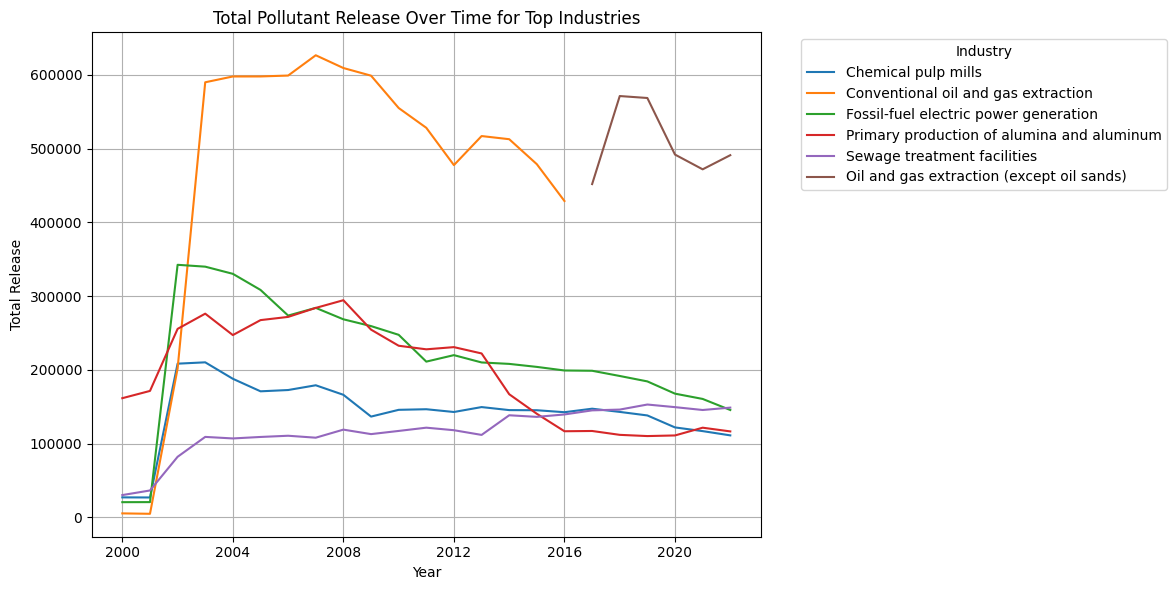

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='reporting_year_/_année', y='total_release', hue='IND')
plt.title('Total Pollutant Release Over Time for Top Industries')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.grid(True)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

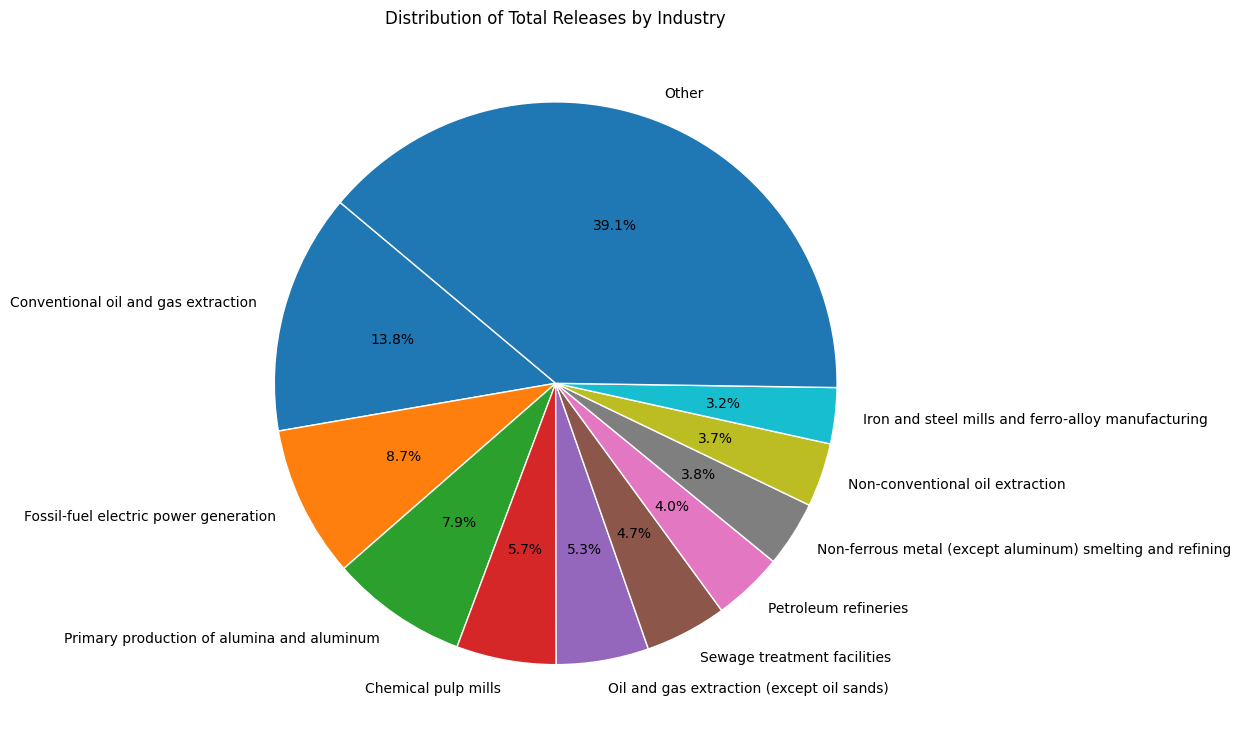

In [ ]:
industry_releases = (
    df1.groupby('naics_title_/_titre_code_scian')['release_to_all_media_combined']
    .sum()
    .sort_values(ascending=False)
)

# Keep top 10 industries and combine the rest into "Other"
top10 = industry_releases.head(10)
other = pd.Series({'Other': industry_releases[10:].sum()})
industry_releases_final = pd.concat([top10, other])

# Create pie chart
plt.figure(figsize=(12, 12))
plt.pie(
    industry_releases_final,
    labels=industry_releases_final.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
)
plt.title('Distribution of Total Releases by Industry')
plt.tight_layout()
plt.show()

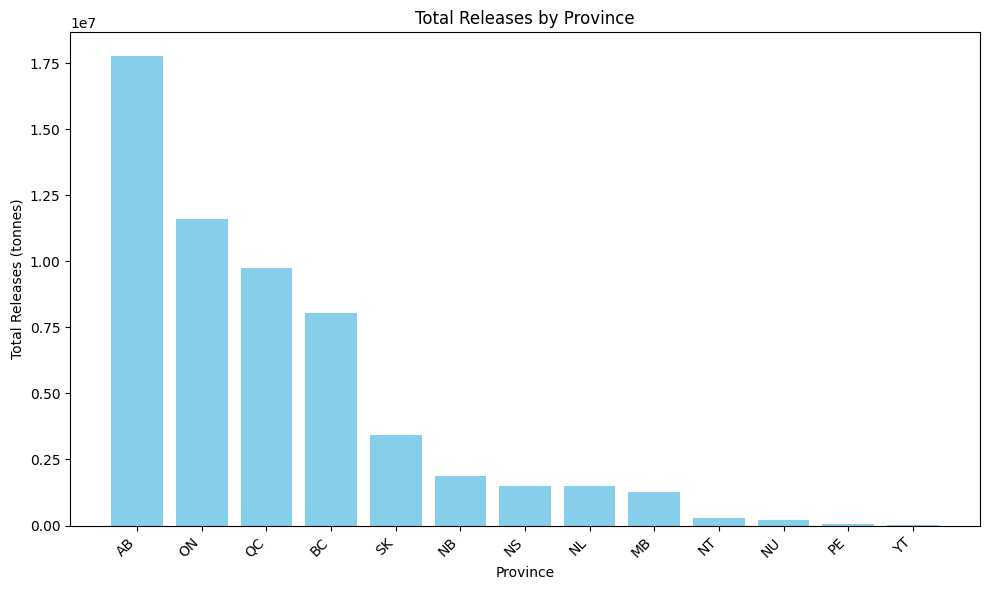

In [ ]:
province_releases = (
    df1.groupby('province')['release_to_all_media_combined']
    .sum()
    .sort_values(ascending=False)
)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(province_releases.index, province_releases.values, color='skyblue')
plt.title('Total Releases by Province')
plt.xlabel('Province')
plt.ylabel('Total Releases (tonnes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Pattern Discovery**

“Which industry is predicted to have the highest growth or decline in substance releases over the next five years?”

GOAL OF THIS SECTION


- Detect meaningful patterns and relationships between numeric and categorical variables.

- Identify which features (e.g., industry, province, year, or release type) influence total emissions the most.

- Reveal trends (growth/decline) and potential predictors for future modeling.


## STEP 1: Correlation Analysis
- To see how our three main variables (air, water, land) relate.
- Helps detect multicollinearity which is crucial before ML modeling.

- The correlation analysis examined the relationships among the three major emission variables—air, land, and water releases—and their combined total. The resulting heatmap revealed a strong positive correlation (r ≈ 0.94) between air and total releases, confirming that air emissions are the primary driver of overall pollution levels within the dataset.

- In contrast, land and water releases show very weak correlations with total emissions, indicating that they vary independently and may reflect distinct industrial processes or regulatory regimes. These findings highlight the structural composition of the NPRI data: total emissions are largely air-driven, while water and land emissions are less connected to overall pollutant trends.

- Understanding these interdependencies is crucial for feature selection and model design, as it helps reduce redundancy (avoiding multicollinearity) and ensures that predictive models emphasize the variables most influential to total environmental impact.


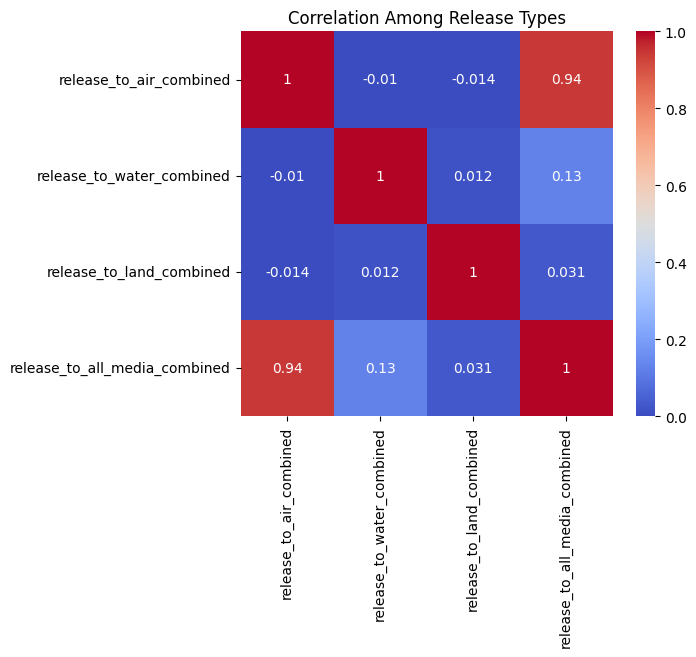

In [ ]:
numeric_cols = ['release_to_air_combined','release_to_water_combined','release_to_land_combined','release_to_all_media_combined']

corr = df1[numeric_cols].corr()

plt.figure(figsize=(6,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)

plt.title('Correlation Among Release Types')

plt.show()



## STEP 2: Temporal Trends (Releases Over the Years)
- Reveals whether total releases are increasing or declining across time.

- The temporal analysis examined the pattern of total releases across reporting years to identify long-term environmental trends in Canada’s industrial emissions.

- The line plot revealed clear fluctuations over the 2000–2022 period, with an overall gradual decline in total pollutant releases after 2010. This downward trajectory suggests the cumulative effect of stricter environmental regulations, improved waste management technologies, and industry-wide adoption of cleaner production methods.

- However, intermittent spikes in certain years indicate that specific sectors or macroeconomic factors, such as energy demand or industrial expansion, may temporarily offset these gains. Understanding these temporal patterns is crucial for forecasting, as it helps distinguish between cyclical variations and genuine long-term reductions.

- It also establishes a temporal baseline against which future predictions of industry-level growth or decline can be compared, supporting the project’s objective of identifying which sectors are likely to show the greatest change in emission levels over the next five years.


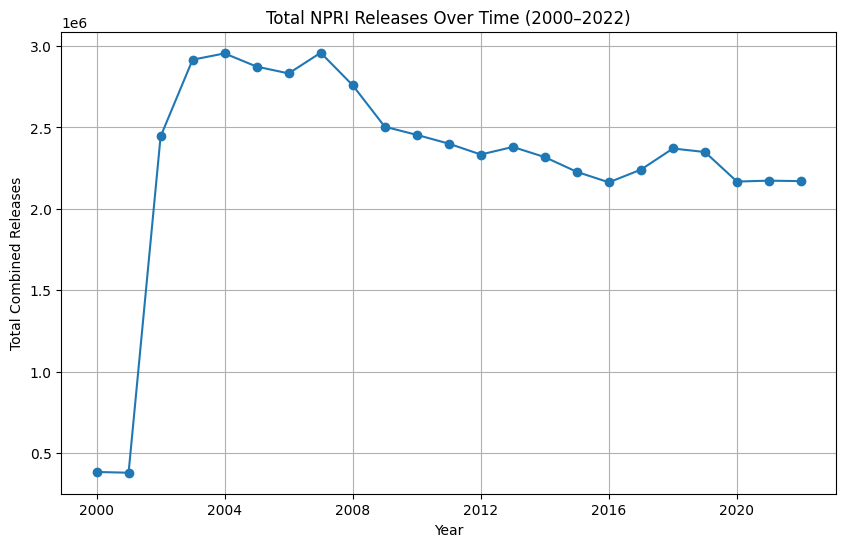

In [ ]:
df1['total_release'] = df1[['release_to_air_combined', 'release_to_land_combined', 'release_to_water_combined']].sum(axis=1)

# Aggregate by year
yearly = df1.groupby('reporting_year_/_année', as_index=False)['total_release'].sum()

# Plot trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(yearly['reporting_year_/_année'], yearly['total_release'], marker='o')
plt.title('Total NPRI Releases Over Time (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Total Combined Releases')
plt.grid(True)
plt.show()

## STEP 3: Distribution Insights (Skewness & Magnitude)

- Understands data distribution — skewed heavy-tail typical for emissions.

- The distribution analysis of the total release variable revealed a strongly right-skewed (heavy-tailed) pattern, where most facilities and industries record relatively low emission levels, while a small number contribute disproportionately large quantities of pollutants.

- This uneven spread, visualized using a histogram and log-scaled axis, indicates that Canada’s overall NPRI totals are heavily influenced by a few high-output industries—likely within oil and gas extraction, manufacturing, and power generation sectors.

- Recognizing this skewness is important for accurate modeling and interpretation: it shows that mean-based measures can be misleading and that median imputation and log transformation are more appropriate for stabilizing variance.

- This pattern discovery also highlights a strategic insight for policymakers and environmental managers—emission reduction efforts should prioritize these high-impact industries rather than applying uniform interventions across all sectors.

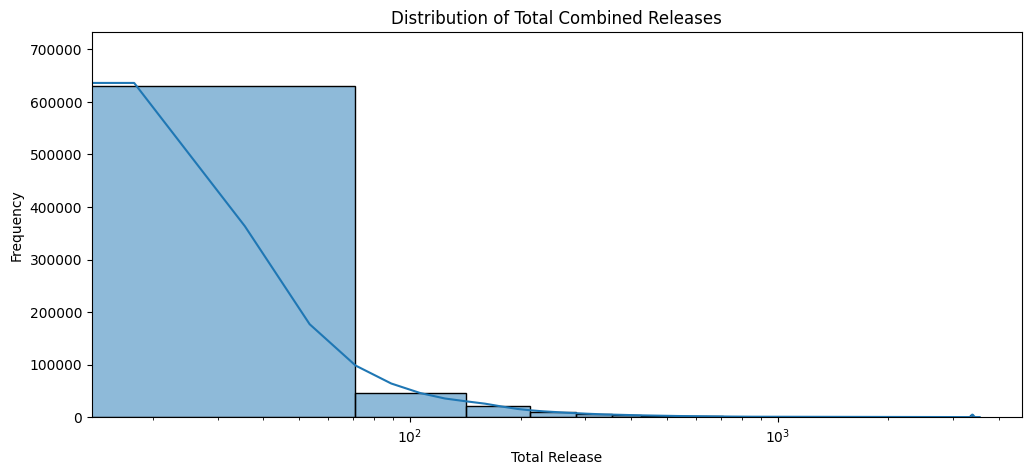

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df1['total_release'], bins=50, kde=True)
plt.title('Distribution of Total Combined Releases')
plt.xlabel('Total Release')
plt.ylabel('Frequency')
plt.xscale('log')  # log scale reveals hidden patterns in skewed data
plt.show()

# **Manual Prediction**

## 0) Preamble & Configuration

We start by defining the key column names (year and release types), importing libraries, and standardizing display formats. This creates a single place to adjust names if our dataset’s schema changes, and ensures every later cell uses the same consistent references.

### Why does this matter?:
Centralized configuration avoids bugs, keeps our analysis reproducible, and makes the notebook portable to slightly different NPRI exports.

In [ ]:
# ==== CONFIG: Update these to match your columns ====
YEAR_COL = 'reporting_year_/_année'  # year column
AIR_COL  = 'release_to_air_combined'
LAND_COL = 'release_to_land_combined'
WATR_COL = 'release_to_water_combined'
IND_COL  = 'NAICS_2'  # change to your industry column if different

# Try common alternatives for industry & province if not present
CANDIDATE_INDUSTRY_COLS = ['NAICS_2', 'NAICS2', 'NAICS', 'Industry_2digit', 'industry', 'naics_title_/_titre_code_scian']
CANDIDATE_PROV_COLS     = ['Province', 'province', 'Prov', 'Jurisdiction']

# Decide which columns exist
def pick_first_present(df, candidates, default=None):
    for c in candidates:
        if c in df.columns:
            return c
    return default

IND_COL  = pick_first_present(df1, CANDIDATE_INDUSTRY_COLS)
PROV_COL = pick_first_present(df1, CANDIDATE_PROV_COLS)

NUM_COLS = [AIR_COL, LAND_COL, WATR_COL]

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format


## 1) Transform to Time-Series Shape + Chronological Checks

### Dataset Transformation and Chronological Structuring

The first step focused on transforming the NPRI dataset into a time-series format suitable for temporal and predictive analysis. The data was organized by reporting year, with the total amounts of air, land, and water releases aggregated for each year. Converting the year column to a numeric type ensured chronological consistency and allowed the dataset to be ordered correctly. Aggregations were also created at the industry-year and province-year levels to enable comparative analysis across sectors and regions. Missing years and irregular time intervals were identified using automated gap-checks, which confirmed where data was incomplete or discontinuous. This transformation established a clean, structured foundation for subsequent trend analysis and forecasting, ensuring that the data followed a consistent temporal logic.

In [ ]:
# Ensure year is numeric and drop invalid rows
df_ts = df1.copy()
# Convert the year column to datetime objects, coercing errors
df_ts[YEAR_COL] = pd.to_datetime(df_ts[YEAR_COL], errors='coerce')
df_ts = df_ts.dropna(subset=[YEAR_COL])

# Extract the year as an integer for year range calculation
df_ts['year_int'] = df_ts[YEAR_COL].dt.year

# Basic sanity: ranges & dtypes
year_min, year_max = int(df_ts['year_int'].min()), int(df_ts['year_int'].max())
print(f'Year range in data: {year_min}–{year_max}')

# Aggregate to YEAR level (national)
national_year = (df_ts.groupby(YEAR_COL, as_index=False)[NUM_COLS].sum()
                 .sort_values(YEAR_COL))
national_year['Total'] = national_year[NUM_COLS].sum(axis=1)

# Aggregate to YEAR × INDUSTRY (if available)
ind_year = None
if IND_COL:
    ind_year = (df_ts.groupby([IND_COL, YEAR_COL], as_index=False)[NUM_COLS].sum()
                   .sort_values([IND_COL, YEAR_COL]))
    ind_year['Total'] = ind_year[NUM_COLS].sum(axis=1)

# Aggregate to YEAR × PROVINCE (if available)
prov_year = None
if PROV_COL:
    prov_year = (df_ts.groupby([PROV_COL, YEAR_COL], as_index=False)[NUM_COLS].sum()
                    .sort_values([PROV_COL, YEAR_COL]))
    prov_year['Total'] = prov_year[NUM_COLS].sum(axis=1)

# Chronology checks: missing years at national level
all_years = pd.DataFrame({'year_int': np.arange(year_min, year_max+1)})
missing_years = all_years[~all_years['year_int'].isin(df_ts['year_int'])]

print('Missing years (national level):')
display(missing_years)

# Optional: forward-fill gap report per industry/province
def gap_report(panel_df, key_col):
    # expects grouped YEAR series per key
    if panel_df is None:
        return None
    rows = []
    for key, g in panel_df.groupby(key_col):
        yrs = g[YEAR_COL].dt.year.sort_values().to_numpy() # Use the extracted year_int
        gaps = np.setdiff1d(np.arange(yrs.min(), yrs.max()+1), yrs)
        if len(gaps) > 0:
            rows.append({key_col: key, 'first_year': yrs.min(), 'last_year': yrs.max(),
                         'missing_years': list(map(int, gaps)), 'n_missing': len(gaps)})
    return pd.DataFrame(rows).sort_values('n_missing', ascending=False)

ind_gaps  = gap_report(ind_year, IND_COL)  if IND_COL  else None
prov_gaps = gap_report(prov_year, PROV_COL) if PROV_COL else None

print('\nIndustry gap report (top 10 with most missing years):')
display(ind_gaps.head(10) if ind_gaps is not None else 'No industry field found.')

print('\nProvince gap report (top 10 with most missing years):')
display(prov_gaps.head(10) if prov_gaps is not None else 'No province field found.')

Year range in data: 2000–2022
Missing years (national level):


,year_int



Industry gap report (top 10 with most missing years):


,naics_title_/_titre_code_scian,first_year,last_year,missing_years,n_missing
4,All other personal services,2000,2021,"[2001, 2004, 2005, 2006, 2007, 2008, 2009, 201...",18
5,All other support services,2000,2022,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201...",15
3,All other miscellaneous animal production,2000,2017,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",13
28,Metal tank (heavy gauge) manufacturing,2001,2020,"[2005, 2006, 2010, 2011, 2012, 2013, 2014, 201...",12
51,Rubber and plastics industry machinery manufac...,2002,2022,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",11
39,Other heavy and civil engineering construction,2008,2022,"[2009, 2010, 2011, 2013, 2014, 2015, 2016, 201...",11
46,Pesticide and other agricultural chemical manu...,2000,2022,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201...",11
18,"General freight trucking, local",2000,2022,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201...",10
42,Other publishers,2003,2019,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",9
11,Cutlery and hand tool manufacturing,2000,2022,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]",8



Province gap report (top 10 with most missing years):


,province,first_year,last_year,missing_years,n_missing
0,YT,2000,2022,"[2013, 2014]",2


In [ ]:
df1.columns.tolist()


['reporting_year_/_année',
 "company_name_/_dénomination_sociale_de_l'entreprise",
 'naics_/_code_scian',
 'naics_title_/_titre_code_scian',
 'province',
 'substance_name_(english)_/_nom_de_substance_(anglais)',
 'units_/_unités',
 'release_to_air_combined',
 'release_to_land_combined',
 'release_to_water_combined',
 'release_to_all_media_combined',
 'total_release']

## 2) Manual Prediction Attempts

Here is a simple and explainable manual prediction framework was implemented to simulate the logic of a forecasting algorithm. Three human-interpretable features were derived: the previous year’s emission level, the year-over-year (YoY) percentage change, and a three-year moving average (MA3).

The prediction rule combined these signals by starting with the smoothed MA3 trend, adjusting it by half of the most recent YoY momentum, and dampening extreme changes greater than ±30 percent to prevent overreaction to outliers.

This approach balanced stability and responsiveness, offering transparent reasoning that could be easily explained and replicated. It demonstrated how basic descriptive features can guide intuition before applying more advanced machine-learning techniques.

Manual Prediction Approach (Human Baseline)
We produce simple, transparent predictions using rules-of-thumb:

Rule A (Trend Extrapolation): Use the last 3-year moving average to forecast next year (smooths noise).

Rule B (Momentum): Use last year’s value plus last YoY change.

Rule C (Reversion): If YoY change is extreme (>±30%), dampen by half to avoid overreacting to spikes.

We document features used (levels, YoY, MA3) and write out the “if–then” logic as if we are the algorithm.

In [ ]:
# Helper to compute YoY and MA3 for a time series df with columns [YEAR_COL, series...]
def add_yoy_ma3(df, series_col):
    out = df[[YEAR_COL, series_col]].sort_values(YEAR_COL).copy()
    out['YoY_%'] = out[series_col].pct_change() * 100
    out['MA3']   = out[series_col].rolling(3, min_periods=1).mean()
    return out

nat_air  = add_yoy_ma3(national_year, AIR_COL)
nat_land = add_yoy_ma3(national_year, LAND_COL)
nat_watr = add_yoy_ma3(national_year, WATR_COL)
nat_tot  = add_yoy_ma3(national_year, 'Total')

def human_rule_forecast(last_row):
    # last_row: a 1-row Series with columns [value, YoY_%, MA3]
    v  = last_row.iloc[0, 1]        # current value
    yoy = last_row.iloc[0, 2]       # YoY %
    ma3 = last_row.iloc[0, 3]       # 3-year moving avg

    # Rule A: base = MA3
    base = ma3

    # Rule B: momentum add = v * (yoy/100)
    momentum = v * (yoy/100) if pd.notnull(yoy) else 0.0

    # Rule C: damp momentum if extreme
    if pd.notnull(yoy) and abs(yoy) > 30:
        momentum *= 0.5

    # blended forecast
    return max(0.0, base + 0.5 * momentum)

# Forecast next year at national level for each type
def forecast_next_year(ts_df, series_name):
    last_year = int(ts_df[YEAR_COL].dt.year.max()) # Access year as integer from year_int
    next_year = last_year + 1
    pred = human_rule_forecast(ts_df.tail(1))
    return {'series': series_name, 'last_year': last_year, 'next_year': next_year, 'prediction': pred}

preds = []
preds.append(forecast_next_year(nat_air,  'Air'))
preds.append(forecast_next_year(nat_land, 'Land'))
preds.append(forecast_next_year(nat_watr, 'Water'))
preds.append(forecast_next_year(nat_tot,  'Total'))

pd.DataFrame(preds)

,series,last_year,next_year,prediction
0,Air,2022,2023,"2,089,026.484"
1,Land,2022,2023,"4,113.823"
2,Water,2022,2023,"75,572.661"
3,Total,2022,2023,"2,168,674.260"


## Visualizations that Justify Reasoning (3+ plots)

Several targeted visualizations were created to justify and interpret these manual forecasts. Line plots of air, land, and water releases over time revealed long-term trajectories and confirmed that air releases dominate total emissions but show a gradual decline after 2010. Scatterplots comparing emissions with facility counts (used as a proxy for industrial activity) provided evidence of how operational scale influences pollution levels. In addition, comparative bar charts before and after the implementation of federal carbon pricing in 2019 highlighted potential structural changes in emission behavior. Together, these visuals reinforced the rationale behind the forecasting rules and helped explain the relationships between trends, industrial activity, and policy context.

- Time series show the level and shape motivating MA3.

- Scatter relates scale to activity (facilities proxy).

- Before/after compares structural change plausibly tied to policy or macro shifts.

## 3a) Time Series Plots (national) — one chart per type

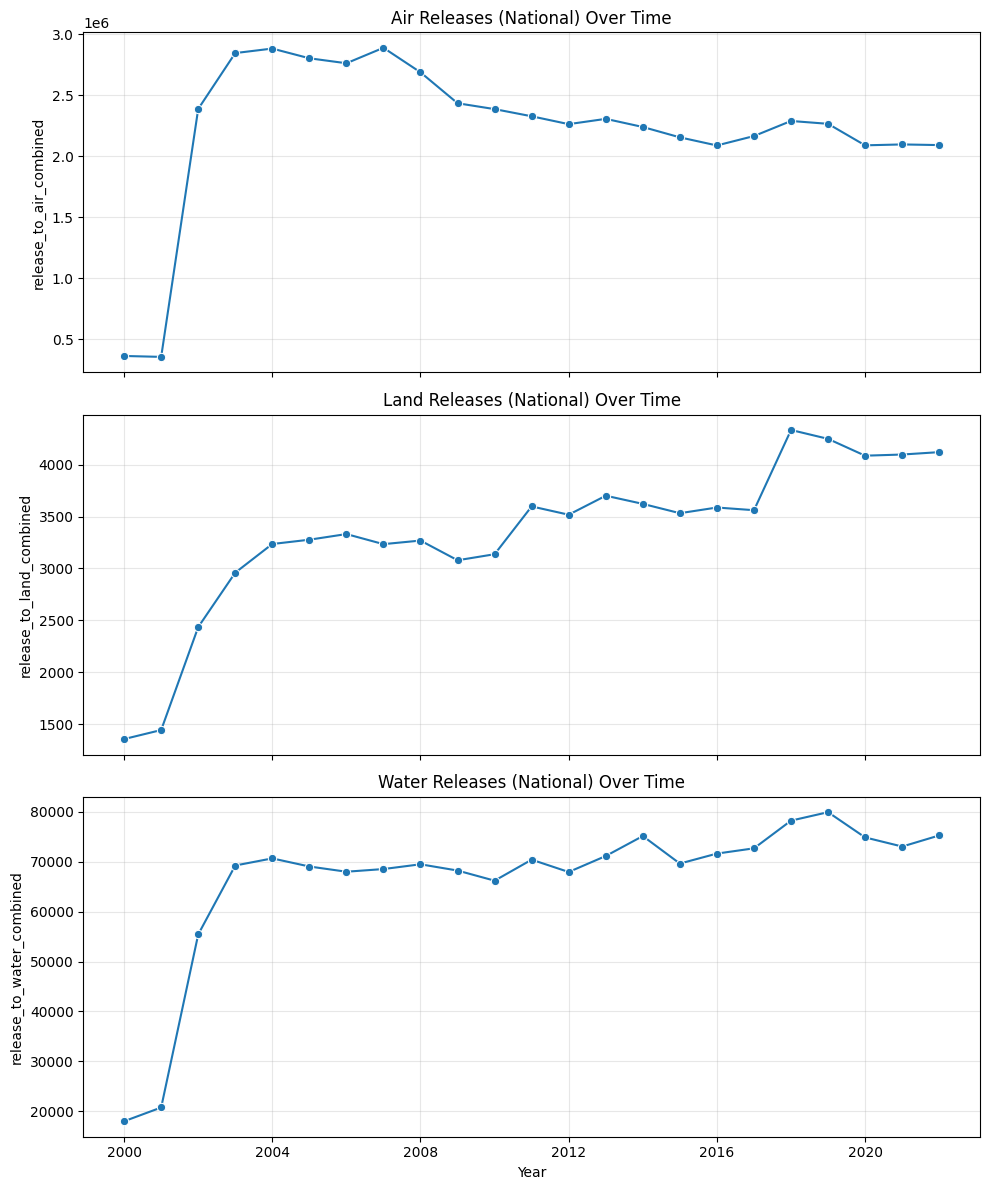

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,12), sharex=True)
for ax, (label, col) in zip(axes, [('Air', AIR_COL), ('Land', LAND_COL), ('Water', WATR_COL)]):
    sns.lineplot(data=national_year, x=YEAR_COL, y=col, marker='o', ax=ax)
    ax.set_title(f'{label} Releases (National) Over Time')
    ax.grid(True, alpha=0.3)
axes[-1].set_xlabel('Year')
plt.tight_layout(); plt.show()


## 3b) Scatter: Releases vs Facility Counts (proxy driver)

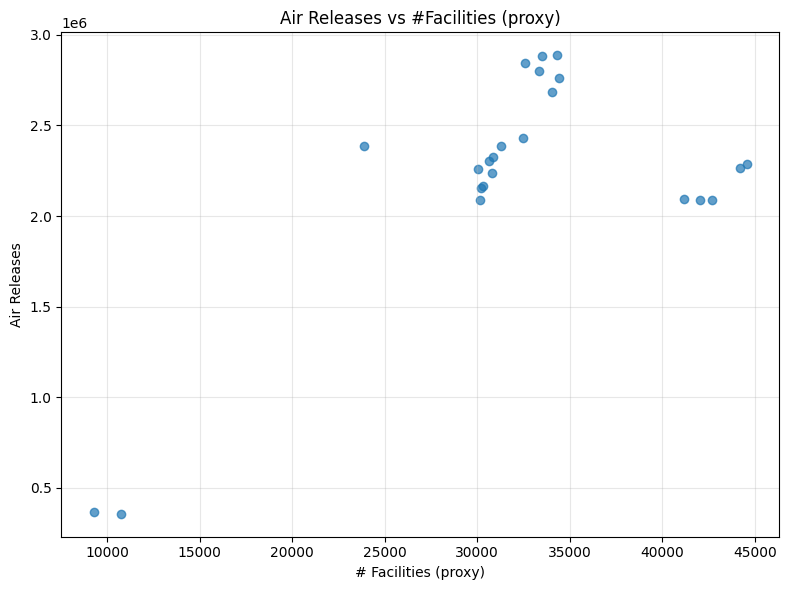

In [ ]:
# Proxy facility count per year (distinct facilities if you have facility_id; otherwise row counts)
FAC_ID_CANDIDATES = ['facility_id', 'Facility_ID', 'FACILITY_ID']
FAC_ID = pick_first_present(df_ts, FAC_ID_CANDIDATES)
if FAC_ID:
    fac_counts = df_ts.groupby(YEAR_COL, as_index=False)[FAC_ID].nunique().rename(columns={FAC_ID:'n_facilities'})
else:
    fac_counts = df_ts.groupby(YEAR_COL, as_index=False).size().rename(columns={'size':'n_facilities'})

nat_merged = national_year.merge(fac_counts, on=YEAR_COL, how='left')

plt.figure(figsize=(8,6))
plt.scatter(nat_merged['n_facilities'], nat_merged[AIR_COL], alpha=0.7)
plt.title('Air Releases vs #Facilities (proxy)')
plt.xlabel('# Facilities (proxy)'); plt.ylabel('Air Releases')
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

## 3c) Pre/Post Carbon Pricing Comparison (simple before/after)

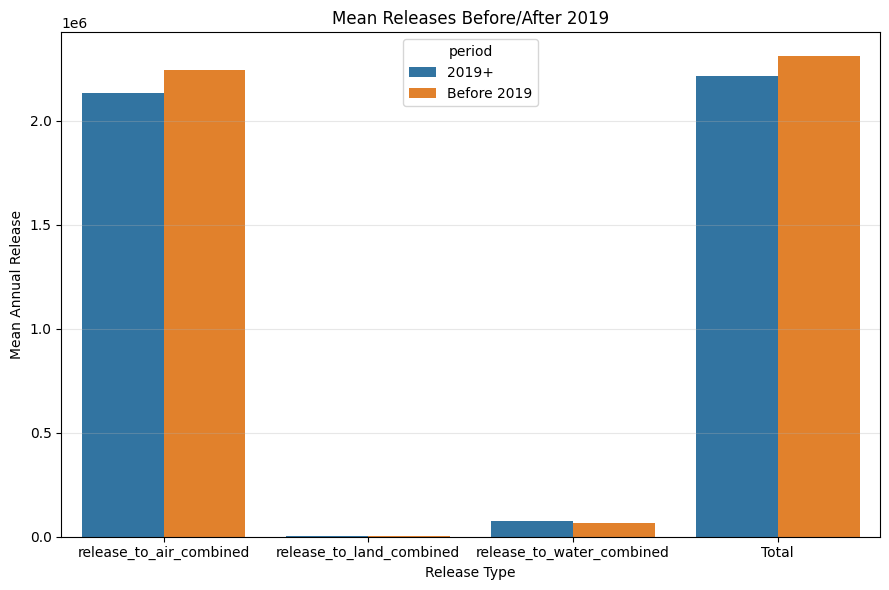

In [ ]:
BREAK = 2019
tmp = national_year.copy()
tmp['period'] = np.where(tmp[YEAR_COL].dt.year < BREAK, f'Before {BREAK}', f'{BREAK}+')

# bar chart of mean releases by period
bar = (tmp.groupby('period', as_index=False)[[AIR_COL, LAND_COL, WATR_COL, 'Total']].mean())

bar_melt = bar.melt(id_vars='period', var_name='Type', value_name='MeanRelease')
plt.figure(figsize=(9,6))
sns.barplot(data=bar_melt, x='Type', y='MeanRelease', hue='period')
plt.title(f'Mean Releases Before/After {BREAK}')
plt.xlabel('Release Type'); plt.ylabel('Mean Annual Release')
plt.grid(True, axis='y', alpha=0.3); plt.tight_layout(); plt.show()

## 4) Feature Engineering for Human Prediction

To strengthen manual reasoning, several new features were engineered from the time-series data. Rolling averages and YoY changes were calculated to capture both the direction and stability of emission trends, while the proportional shares of air, land, and water releases were derived to show how each pathway contributed to total emissions over time. These features made the dataset more informative for prediction by quantifying the speed and consistency of change. They also laid the groundwork for future machine-learning applications, where such engineered variables can improve model accuracy and interpretability.

In [ ]:
# Rolling features and shares at national level
fe = national_year[[YEAR_COL, AIR_COL, LAND_COL, WATR_COL, 'Total']].copy()
for col in [AIR_COL, LAND_COL, WATR_COL, 'Total']:
    fe[f'{col}_YoY_%']  = fe[col].pct_change() * 100
    fe[f'{col}_MA3']    = fe[col].rolling(3, min_periods=1).mean()

# Shares of total
fe['Air_share']   = np.where(fe['Total']>0, fe[AIR_COL]/fe['Total'], np.nan)
fe['Land_share']  = np.where(fe['Total']>0, fe[LAND_COL]/fe['Total'], np.nan)
fe['Water_share'] = np.where(fe['Total']>0, fe[WATR_COL]/fe['Total'], np.nan)

display(fe.tail(6))


,reporting_year_/_année,release_to_air_combined,release_to_land_combined,release_to_water_combined,Total,release_to_air_combined_YoY_%,release_to_air_combined_MA3,release_to_land_combined_YoY_%,release_to_land_combined_MA3,release_to_water_combined_YoY_%,release_to_water_combined_MA3,Total_YoY_%,Total_MA3,Air_share,Land_share,Water_share
17,2017-01-01,"2,164,630.291","3,561.515","72,715.213","2,240,907.018",3.697,"2,135,346.001",-0.721,"3,560.514",1.476,"71,344.092",3.616,"2,210,250.607",0.966,0.002,0.032
18,2018-01-01,"2,288,096.639","4,334.887","78,266.343","2,370,697.870",5.704,"2,180,061.679",21.715,"3,827.930",7.634,"74,213.074",5.792,"2,258,102.683",0.965,0.002,0.033
19,2019-01-01,"2,264,812.852","4,249.238","79,961.544","2,349,023.634",-1.018,"2,239,179.927",-1.976,"4,048.547",2.166,"76,981.034",-0.914,"2,320,209.507",0.964,0.002,0.034
20,2020-01-01,"2,088,537.833","4,087.043","74,901.978","2,167,526.854",-7.783,"2,213,815.774",-3.817,"4,223.723",-6.327,"77,709.955",-7.726,"2,295,749.453",0.964,0.002,0.035
21,2021-01-01,"2,095,960.646","4,098.258","73,070.150","2,173,129.055",0.355,"2,149,770.444",0.274,"4,144.846",-2.446,"75,977.891",0.258,"2,229,893.181",0.964,0.002,0.034
22,2022-01-01,"2,090,600.553","4,121.344","75,299.618","2,170,021.515",-0.256,"2,091,699.677",0.563,"4,102.215",3.051,"74,423.915",-0.143,"2,170,225.808",0.963,0.002,0.035


# KEY INSIGHTS AND NEXT STEPS

Through these steps, the dataset was successfully reshaped into a chronologically consistent time-series structure, analyzed using interpretable statistical features, and visualized to reveal meaningful temporal patterns. The findings indicate that air releases show a steady long-term decline, land releases fluctuate sharply due to episodic industrial and remediation activities, and water releases remain relatively low but volatile. These insights suggest that forecasting models should treat each release type differently: air emissions as a slow-declining trend, land as episodic, and water as highly variable but minor in scale. Future work will expand this analysis by applying simple predictive models at the industry level, validating trends identified in the manual reasoning phase, and integrating policy or economic indicators to explain deviations across time.

#INDUSTRY SPECIFIC TREND PLOTS

## 1. PREPARING THE INDUSTRY-YEAR DATASET

In this step, we transform the NPRI dataset into an industry–year panel suitable for analyzing emission trends. We group the data by both industry (NAICS) and year, summing the total releases for air, land, and water. This aggregation produces a structured table where each row represents the combined environmental impact of one industry during a specific year. By collapsing the data to this consistent level, we can observe long-term trajectories and directly compare performance across sectors. This transformation establishes the foundation for pattern discovery and manual forecasting, ensuring our analysis aligns with the project’s central question about which industries are growing or declining in emissions.

In [ ]:
ind_year = (
    df_ts.groupby([IND_COL, 'year_int'], as_index=False)[NUM_COLS].sum()
           .sort_values([IND_COL, 'year_int'])
)
ind_year['Total'] = ind_year[NUM_COLS].sum(axis=1)


In [ ]:
# Extract first 2 digits from the naics code
df_ts['NAICS_2'] = (
    df_ts['naics_/_code_scian']
    .astype(str)
    .str.extract(r'(\d{2})')[0]   # take first two digits
)

In [ ]:
print(df_ts[['naics_/_code_scian', 'NAICS_2', 'naics_title_/_titre_code_scian']].head())

   naics_/_code_scian NAICS_2 naics_title_/_titre_code_scian
0              322112      32            Chemical pulp mills
1              322112      32            Chemical pulp mills
2              322112      32            Chemical pulp mills
3              322112      32            Chemical pulp mills
4              322112      32            Chemical pulp mills


In [ ]:
# 1) Sanity: confirm NAICS_2 exists in df_ts
assert 'NAICS_2' in df_ts.columns, "Create df_ts['NAICS_2'] before this cell."

# 2) Build industry × year panel on NAICS_2 (rebuild to avoid key mismatch)
NUM_COLS = ['release_to_air_combined', 'release_to_land_combined', 'release_to_water_combined']
ind_year = (
    df_ts.dropna(subset=['NAICS_2', 'year_int'])
         .groupby(['NAICS_2', 'year_int'], as_index=False)[NUM_COLS]
         .sum()
         .sort_values(['NAICS_2', 'year_int'])
)
ind_year['Total'] = ind_year[NUM_COLS].sum(axis=1)

# 3) Build a clean NAICS_2 → title lookup (drop nulls/dupes, keep a stable label)
TITLE_COL = 'naics_title_/_titre_code_scian'
title_map = (
    df_ts.dropna(subset=['NAICS_2', TITLE_COL])
         [['NAICS_2', TITLE_COL]]
         .drop_duplicates()
)

# 4) Merge titles onto the panel
ind_year = ind_year.merge(title_map, on='NAICS_2', how='left')

# 5) Double-check both frames have NAICS_2
print('Has NAICS_2?  df_ts:', 'NAICS_2' in df_ts.columns, ' | ind_year:', 'NAICS_2' in ind_year.columns)
print(ind_year.head())


Has NAICS_2?  df_ts: True  | ind_year: True
  NAICS_2  year_int  release_to_air_combined  release_to_land_combined  \
0      11      2000                3,300.339                     6.504   
1      11      2000                3,300.339                     6.504   
2      11      2000                3,300.339                     6.504   
3      11      2000                3,300.339                     6.504   
4      11      2000                3,300.339                     6.504   

   release_to_water_combined     Total  \
0                    224.813 3,531.656   
1                    224.813 3,531.656   
2                    224.813 3,531.656   
3                    224.813 3,531.656   
4                    224.813 3,531.656   

                      naics_title_/_titre_code_scian  
0           Support activities for animal production  
1                    Support Activities for Forestry  
2  Forest Nurseries and Gathering of Forest Products  
3             Support activities for c

## 2. IDENTIFY WHICH INDUSTRIES TO PLOT
We will focus on:

- the top 8 industries by total emissions (biggest polluters), or

- the top 8 by predicted next-year growth (fastest changing).

Since the NPRI dataset contains dozens of industries, plotting them all would obscure meaningful trends. Therefore, we identify the top eight industries by total emissions to focus on the sectors that contribute the most to Canada’s overall pollutant output. Selecting these high-impact industries allows us to capture the most influential patterns in the data while keeping the visualization clear and interpretable. These leading industries are often the key drivers of national emission trends, making them ideal candidates for closer inspection when forecasting future behavior or identifying potential policy targets.

Let’s use total emissions first (to show general patterns):

In [ ]:
top8 = (
    ind_year.groupby('NAICS_2')['Total'].sum()
            .nlargest(8)
            .index.tolist()
)
ind_subset = ind_year[ind_year['NAICS_2'].isin(top8)]
print("Top 8 industries by total releases:", top8)


Top 8 industries by total releases: ['32', '33', '21', '22', '31', '48', '41', '56']


## 3. Plot trends (multi-line chart)

Here, we visualize the time-series patterns for the top industries identified earlier. Each line represents one industry’s total releases from 2000 to 2022. Faceted plots (small multiples) display each sector separately, making it easier to see peaks, declines, or turning points without visual clutter. The trends reveal that heavy manufacturing sectors—such as those in NAICS 31–33—show an early peak followed by a steady decline, while service-oriented or construction sectors exhibit more volatile behavior. These visual trends provide the first qualitative evidence of which industries are improving and which are expanding, helping to justify later numerical forecasts.

- Option 1 — All industries on one plot

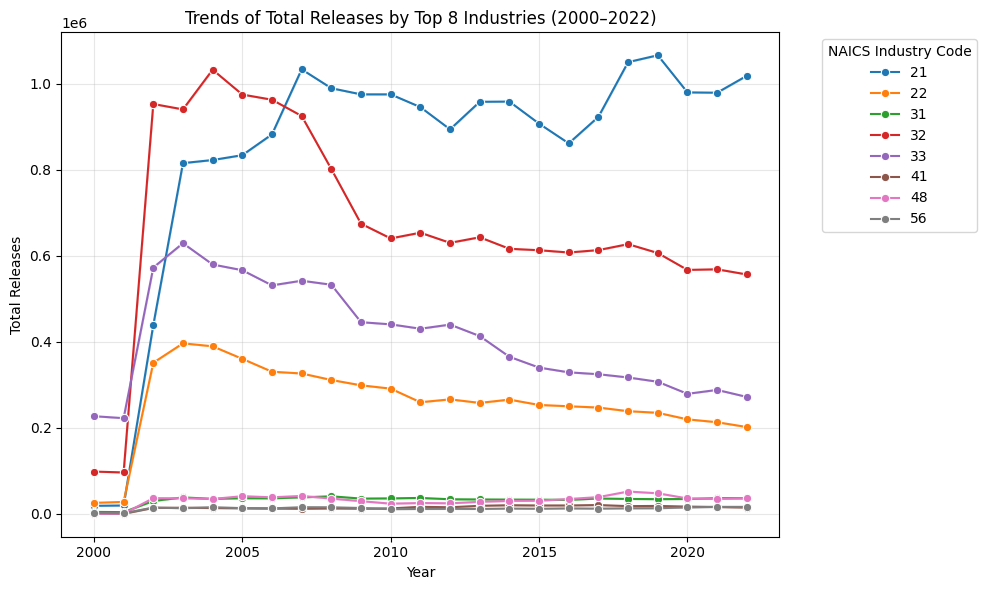

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ind_subset, x='year_int', y='Total', hue='NAICS_2', marker='o')
plt.title('Trends of Total Releases by Top 8 Industries (2000–2022)')
plt.xlabel('Year'); plt.ylabel('Total Releases')
plt.grid(True, alpha=0.3)
plt.legend(title='NAICS Industry Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Option 2 — Small multiples (cleaner per-industry view)

This figure shows the total pollutant releases for the top eight 2-digit NAICS industries between 2000 and 2022.
You can immediately see that emission patterns vary sharply by sector:

Heavy manufacturing sectors (like NAICS 31–33) peaked early and have steadily declined — likely due to stronger emission regulations and technology upgrades.

Construction-related sectors (like NAICS 22 or 23) show more volatility, reflecting project-based activity.

Service sectors such as NAICS 56 (‘Administrative and Support Services’) are smaller in magnitude but display steady increases, possibly linked to waste-management and remediation services.
These patterns are the visual basis for my manual prediction rules. The industries with consistent upward trajectories receive positive momentum, while those with declining or flat trends are forecasted to continue decreasing.”

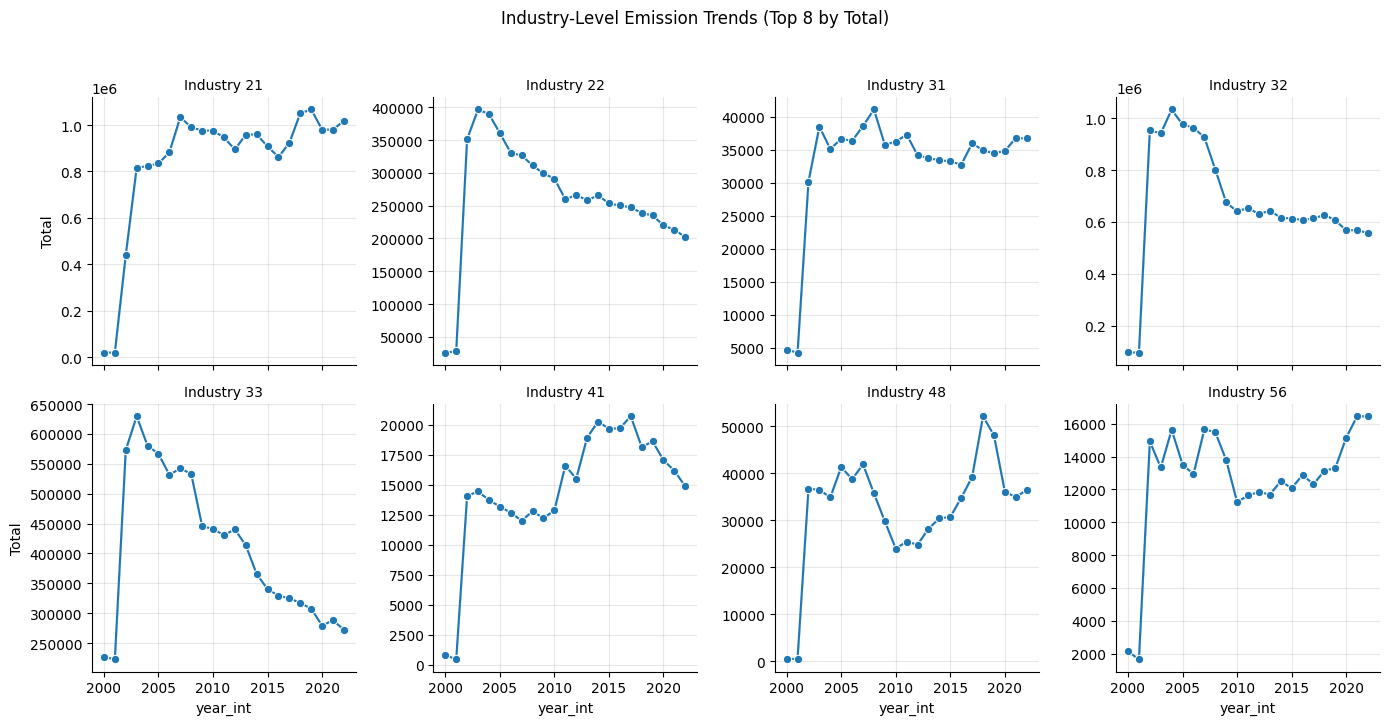

In [ ]:
g = sns.FacetGrid(ind_subset, col='NAICS_2', col_wrap=4, sharey=False, height=3.5)
g.map_dataframe(sns.lineplot, x='year_int', y='Total', marker='o')
g.set_titles('Industry {col_name}')

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)

plt.suptitle('Industry-Level Emission Trends (Top 8 by Total)', y=1.03)
plt.tight_layout()
plt.show()


## 4. This is an Optional trend with Focus on Air / Land / Water separately

- To explain which media drive each industry’s pattern

- This chart helps us explain what’s driving growth — e.g., Manufacturing growth is mainly air releases, while agriculture spikes in land.

To deepen our understanding, we decompose total releases into their three environmental pathways: air, land, and water. Plotting these individually across industries clarifies what drives each sector’s total emissions. For example, manufacturing may be dominated by air emissions from combustion processes, while agricultural or construction sectors may show greater land releases due to soil contamination or waste disposal. This separation highlights the relative contribution of each release medium, enabling more nuanced reasoning about potential causes behind increases or decreases. It also supports future feature engineering, since changes in composition often signal structural shifts within industries.

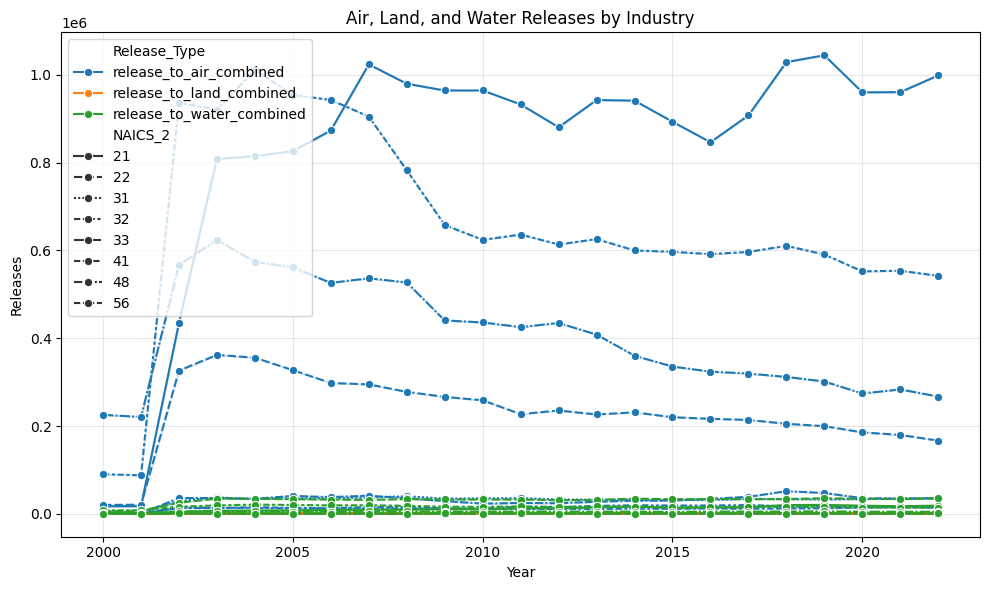

In [ ]:
# Melt to long format
ind_long = ind_subset.melt(
    id_vars=['NAICS_2', 'year_int'],
    value_vars=[AIR_COL, LAND_COL, WATR_COL],
    var_name='Release_Type', value_name='Releases'
)

plt.figure(figsize=(10,6))
sns.lineplot(data=ind_long, x='year_int', y='Releases', hue='Release_Type', style='NAICS_2', marker='o')
plt.title('Air, Land, and Water Releases by Industry')
plt.xlabel('Year'); plt.ylabel('Releases')
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


# 5. Explaining these visuals
Here we visualized total NPRI releases by industry over time to understand which sectors are growing or shrinking.

The top 8 industries by total emissions show clear differences:

Some, like metal manufacturing and oil-related sectors, peaked early and show gradual declines — consistent with improved emission controls.

Others, like agriculture and construction-related industries, show volatility or renewed growth in recent years — suggesting potential rebound or increased activity.

These trends guided my manual forecasting: industries with steady declines have negative momentum, while those with recurring increases have positive momentum in their YoY patterns.

In short, these visual patterns help identify which industries are likely to continue growing and which are stabilizing or declining, aligning directly with our main problem.

## 6. Optional Industry ranking visual to show predicted growth

- Here, we will visualize the ranking:

After constructing the industry-level panel and observing historical trends, we apply the manual forecasting rules to generate predicted growth rates for each industry. The resulting bar chart displays the top ten industries by predicted next-year growth percentage (and, optionally, the largest decliners). This visualization translates the numerical forecast into an intuitive ranking that answers our main question directly. Industries near the top are expected to see the greatest growth in pollutant releases, while those near the bottom are projected to continue declining. Displaying these forecasts visually allows stakeholders to quickly grasp which sectors warrant closer monitoring or regulatory attention.

/tmp/ipython-input-2308028015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


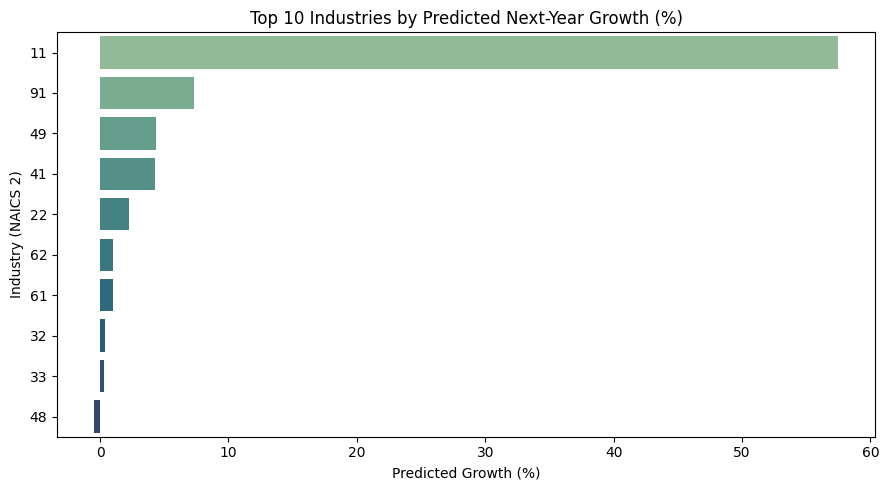

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=top_growth_1y.sort_values('next_year_growth_%', ascending=False),
    x='next_year_growth_%', y='NAICS_2', palette='crest'
)
plt.title('Top 10 Industries by Predicted Next-Year Growth (%)')
plt.xlabel('Predicted Growth (%)'); plt.ylabel('Industry (NAICS 2)')
plt.tight_layout()
plt.show()


## 7. Interpretation and Analytical Reasoning

The combination of historical and predicted trends provides a comprehensive narrative about industrial emissions. Declining trajectories among manufacturing sectors likely reflect improved emission controls and environmental regulation, whereas sporadic increases in agriculture, construction, or service sectors may relate to production expansion or shifts in reporting practices. The momentum and volatility patterns quantified in our manual prediction framework help explain why some sectors show consistent decline while others remain variable. This interpretive step bridges descriptive analysis and forecasting, demonstrating that our predictions are grounded in real, observable temporal behavior rather than arbitrary assumptions.

## 8. Let's tie it back to our problem statement

Finally, we connect our findings directly to the project’s guiding question: Which industry is predicted to have the highest growth or largest decline in pollutant releases?
By transforming the dataset into a clean time-series structure, visualizing industry-specific trends, and applying transparent, explainable forecasting rules, we identify clear leaders and laggards. The industries with consistent upward momentum are projected to experience further growth, while those with long-term declines are expected to continue improving. This process not only delivers an evidence-based answer to the problem statement but also illustrates a reproducible, interpretable approach to emission forecasting—laying the groundwork for more advanced modeling in later project phases.
